# Plotting Distane from Present-Day Grounding Line

# 1. Load Dataset

In [1]:
import xarray as xr
import gcsfs
gcs = gcsfs.GCSFileSystem(token=None, access='read_only')

In [2]:
snapshots1ka = xr.open_zarr(gcs.get_mapper('gs://ldeo-glaciology/paleo_ensemble/snapshots1ka.zarr'))
snapshots1ka = snapshots1ka.chunk(chunks={'time':1})

In [3]:
# Add these codes to decrease CPU and memory use, which avoids the workers from being killed.
from dask.distributed import Client
import dask_gateway

gateway = dask_gateway.Gateway()

# Close existing clusters
open_clusters = gateway.list_clusters()
print(list(open_clusters))
if len(open_clusters)>0:
    for c in open_clusters:
         cluster = gateway.connect(c.name)
         cluster.shutdown()  

# Increase worker memory
options = gateway.cluster_options()
options.worker_memory = 16

cluster = gateway.new_cluster(cluster_options=options)

[]


In [4]:
# Start up cloud cluster with 20 workers
cluster.scale(20)
client = Client(cluster)

In [5]:
client

Connection method: Cluster object,Cluster type: dask_gateway.GatewayCluster
Dashboard: /services/dask-gateway/clusters/prod.a0af706a97ef4a0eb52dc9308b60d910/status,


# 2. Define Section

To begin with, I determined two points to define a section in the Weddell Sea sector. The selected two points were (-1.5e6, 1.5e6) and (-0.7e6, 0). The analysis was performed on the present condition with all the ensemble parameters averaged. The defined section is indicated on the ice-type plot below.

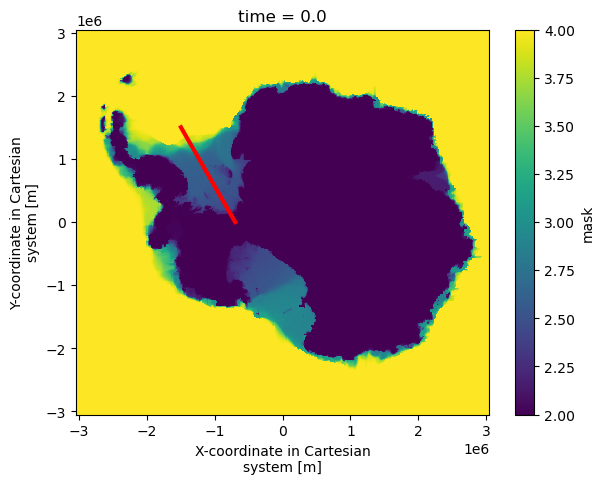

In [6]:
import matplotlib.pyplot as plt
snapshots1ka.mask.isel(time=124).mean({"par_esia","par_ppq","par_prec","par_visc"}).plot(x='x',y='y',size = 5)
x = [-1.5e6, -0.7e6]
y = [1.5e6, 0]
plt.plot(x,y,color="red", lw=3)

# 3. Determine the Grounding Line Position

Next, I used advanced interpolation to determine the position of the present-day grounding line on the defined section. I defined the point with mask = 2.5 to be the present-day grounding line because it is the transition point between grounded ice (mask = 2.0) and floating ice (mask = 3.0). For advanced interpolation, I created new xarray objects that correspond to the x- and y- coordinates.

In [7]:
import numpy as np
# the x coordinates for the 1000 points between points (-1.5e6,1.1e6) and (-0.7e6,0) are defined
x = np.linspace(-1.5e6, -0.7e6, 1000)
# the y coordinates for the 1000 points between points (-1.5e6,1.1e6) and (-0.7e6,0) are defined
y = np.linspace(1.5e6, 0, 1000)

# create xarray datasets
x = xr.DataArray(x, dims="z")
y = xr.DataArray(y , dims="z")

In [8]:
# Advanced interpolation
ice = snapshots1ka.mask.isel(time=124).mean({"par_esia","par_ppq","par_prec","par_visc"}).interp(x=x, y=y).values
ice

array([4.        , 4.        , 4.        , 4.        , 4.        ,
       4.        , 4.        , 4.        , 4.        , 4.        ,
       4.        , 4.        , 4.        , 4.        , 4.        ,
       4.        , 4.        , 4.        , 4.        , 4.        ,
       4.        , 4.        , 4.        , 4.        , 4.        ,
       4.        , 4.        , 4.        , 4.        , 4.        ,
       4.        , 4.        , 4.        , 4.        , 4.        ,
       4.        , 4.        , 4.        , 4.        , 4.        ,
       4.        , 4.        , 4.        , 4.        , 4.        ,
       4.        , 4.        , 4.        , 4.        , 4.        ,
       4.        , 4.        , 4.        , 4.        , 4.        ,
       4.        , 4.        , 4.        , 4.        , 4.        ,
       4.        , 4.        , 4.        , 4.        , 4.        ,
       4.        , 4.        , 4.        , 4.        , 4.        ,
       4.        , 4.        , 4.        , 4.        , 4.     

In [9]:
# the position of the grounding line
np.min(np.where(ice < 2.5))

698

The position of the grounding line was computed to be the 698th point on the section.

In [10]:
# compute the x- and y- coordinates for the grounding line position
print("x coordinate:", x[698])
print("y coordinate:", y[698])

x coordinate: <xarray.DataArray ()>
array(-941041.04104104)
y coordinate: <xarray.DataArray ()>
array(451951.95195195)


The plot below shows the position of the grounding line on the defined section.

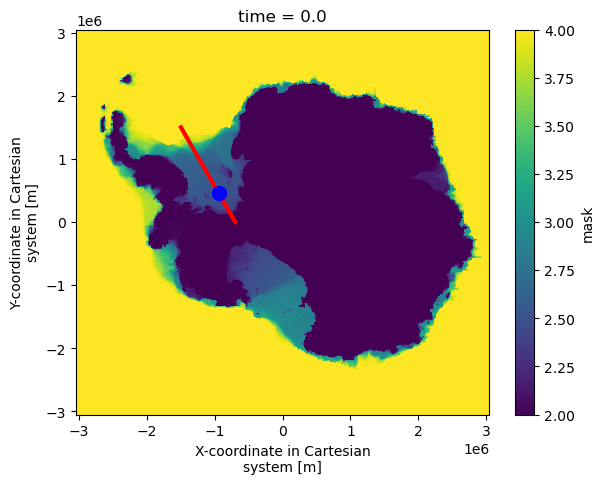

In [11]:
snapshots1ka.mask.isel(time=124).mean({"par_esia","par_ppq","par_prec","par_visc"}).plot(x='x',y='y',size = 5)
x1 = [-1.5e6, -0.7e6]
y1 = [1.5e6, 0]
plt.plot(x1,y1,color="red", lw=3)
plt.plot(x[698], y[698], color="blue", markersize=10,marker="o")

In [12]:
cluster.shutdown()

Exception in callback None()
handle: <Handle cancelled>
Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/tornado/iostream.py", line 1391, in _do_ssl_handshake
    self.socket.do_handshake()
  File "/srv/conda/envs/notebook/lib/python3.9/ssl.py", line 1310, in do_handshake
    self._sslobj.do_handshake()
ssl.SSLCertVerificationError: [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate (_ssl.c:1129)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/srv/conda/envs/notebook/lib/python3.9/asyncio/events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 189, in _handle_events
    handler_func(fileobj, events)
  File "/srv/conda/envs/notebook/lib/python3.9/site-packages/tornado/iostream.py", line 696, in _handle_events
    self._handle